In [69]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt 
import seaborn as sns

# Advanced Visualization
import plotly.express as px
import plotly.graph_objects as go 

# Interactive Notebooks
%matplotlib inline
from IPython.display import display 

# Geospatial map
import folium

In [70]:
# Making a copy of the cleaned data
cleaned_data = pd.read_csv('../Data/Processed/cleaned_sales_data.csv')

In [71]:
data_copy = cleaned_data.copy()

# EDA and Answering some questions

In [72]:
data_copy.head()

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,...,ship-state,ship-postal-code,ship-country,B2B,Month,Day,Year,day_of_week,Total_Sales,Is_Weekend
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,set,S,...,MAHARASHTRA,400081.0,IN,False,4,30,2022,5,0.0,1
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,...,KARNATAKA,560085.0,IN,False,4,30,2022,5,406.0,1
2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,...,MAHARASHTRA,410210.0,IN,True,4,30,2022,5,329.0,1
3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,western dress,L,...,PUDUCHERRY,605008.0,IN,False,4,30,2022,5,0.0,1
4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,top,3XL,...,TAMIL NADU,600073.0,IN,False,4,30,2022,5,574.0,1


In [73]:
data_copy.columns

Index(['Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'B2B', 'Month', 'Day',
       'Year', 'day_of_week', 'Total_Sales', 'Is_Weekend'],
      dtype='object')

In [74]:
data_copy.shape

(128975, 26)

In [75]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 26 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Order ID            128975 non-null  object 
 1   Date                128975 non-null  object 
 2   Status              128975 non-null  object 
 3   Fulfilment          128975 non-null  object 
 4   Sales Channel       128975 non-null  object 
 5   ship-service-level  128975 non-null  object 
 6   Style               128975 non-null  object 
 7   SKU                 128975 non-null  object 
 8   Category            128975 non-null  object 
 9   Size                128975 non-null  object 
 10  ASIN                128975 non-null  object 
 11  Courier Status      128975 non-null  object 
 12  Qty                 128975 non-null  int64  
 13  currency            128975 non-null  object 
 14  Amount              128975 non-null  float64
 15  ship-city           128942 non-nul

In [76]:
data_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Qty,128975.0,0.904431,0.313354,0.0,1.0,1.0,1.0,15.0
Amount,128975.0,648.561465,272.581240,0.0,459.0,635.0,771.0,5584.0
ship-postal-code,128942.0,463966.236509,191476.764941,110001.0,382421.0,500033.0,600024.0,989898.0
Month,128975.0,4.909192,0.818402,3.0,4.0,5.0,6.0,6.0
Day,128975.0,14.925978,8.742876,1.0,7.0,15.0,22.0,31.0
Year,128975.0,2022.000000,0.000000,2022.0,2022.0,2022.0,2022.0,2022.0
day_of_week,128975.0,3.012088,2.026397,0.0,1.0,3.0,5.0,6.0
Total_Sales,128975.0,590.368023,388.161590,0.0,399.0,568.0,771.0,44672.0
Is_Weekend,128975.0,0.295739,0.456376,0.0,0.0,0.0,1.0,1.0


## <mark>Sales Analysis</mark>

#### 1. What is the total revenue generated over the given time frame?

In [77]:
total_revenue = data_copy['Amount'].sum()
print(f'Total Revenue generated over the given time frame is: INR {total_revenue:.3f}')

Total Revenue generated over the given time frame is: INR 83648214.918


In [78]:
cleaned_data['Amount'].describe()

count    128975.000000
mean        648.561465
std         272.581240
min           0.000000
25%         459.000000
50%         635.000000
75%         771.000000
max        5584.000000
Name: Amount, dtype: float64

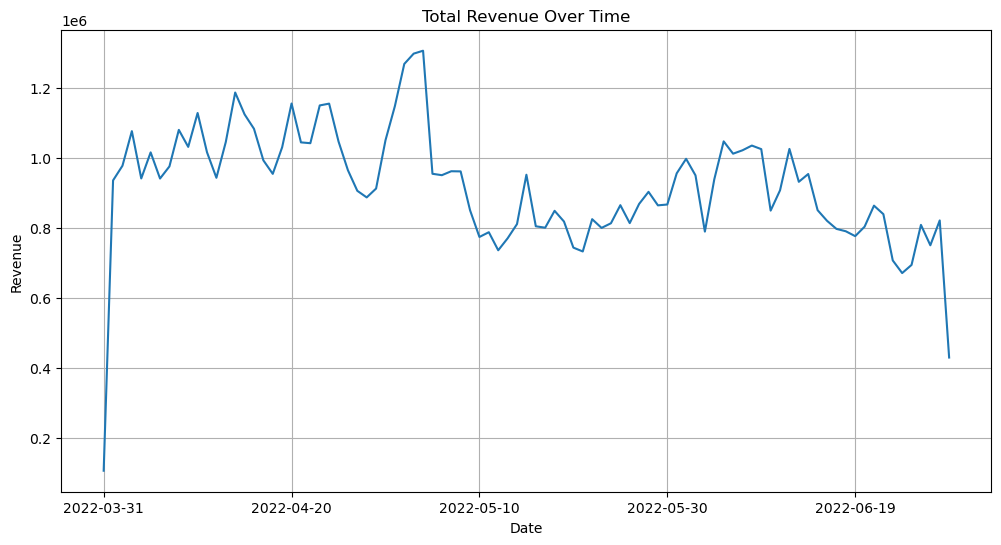

In [79]:
daily_revenue = data_copy.groupby('Date')['Amount'].sum()

plt.figure(figsize=(12, 6))
daily_revenue.plot()
plt.title('Total Revenue Over Time')
plt.ylabel('Revenue')
plt.xlabel('Date')
plt.grid(True)
plt.show()

### 2. How do sales trends look over time?

In [80]:
total_sales_over_time = data_copy.groupby('Date')['Total_Sales'].sum().reset_index()

# Creating the plot
fig = go.Figure()

fig.add_trace(go.Scatter(x=total_sales_over_time['Date'], 
                         y=total_sales_over_time['Total_Sales'],
                         mode='lines+markers',
                         name='Total Sales Over Time',
                         line=dict(color='maroon')))

fig.update_layout(title='Total Sales Over Time',
                  xaxis_title='Date',
                  yaxis_title='Total Sales')

fig.show()

### 3. Which are the top 10 products in terms of sales and quantity?

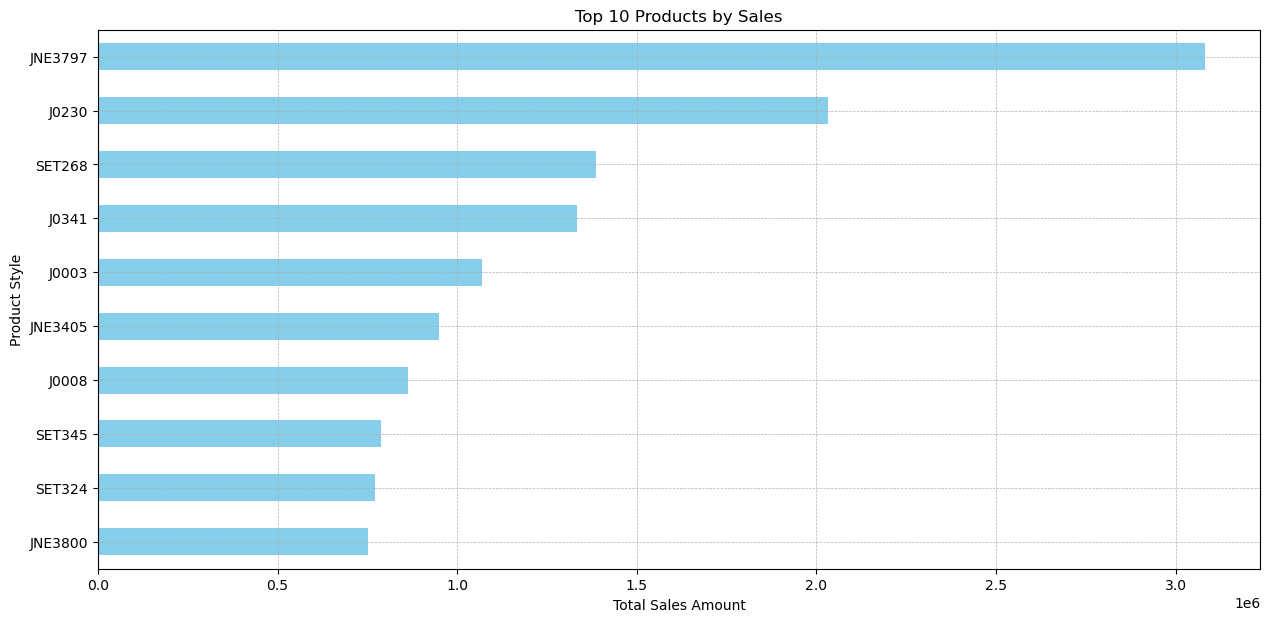

In [81]:
top_10_sales = cleaned_data.groupby('Style')['Amount'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(15, 7))
top_10_sales.plot(kind='barh', color='skyblue')
plt.title('Top 10 Products by Sales')
plt.ylabel('Product Style')
plt.xlabel('Total Sales Amount')
plt.gca().invert_yaxis()  # This is to have the product with highest sales on top
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


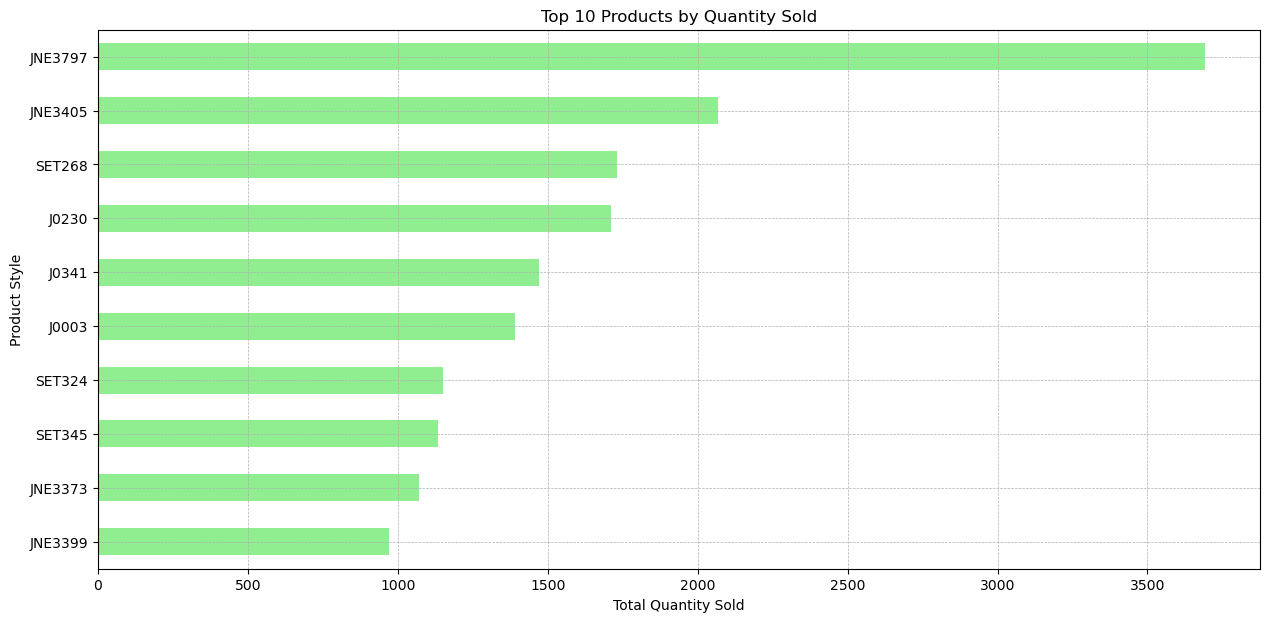

In [82]:
top_10_qty = data_copy.groupby('Style')['Qty'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(15, 7))
top_10_qty.plot(kind='barh', color='lightgreen')
plt.title('Top 10 Products by Quantity Sold')
plt.ylabel('Product Style')
plt.xlabel('Total Quantity Sold')
plt.gca().invert_yaxis()  # This is to have the product with highest quantity on top
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


## <mark>Product Analysis</mark>

### 1. Which categories are the most popular?

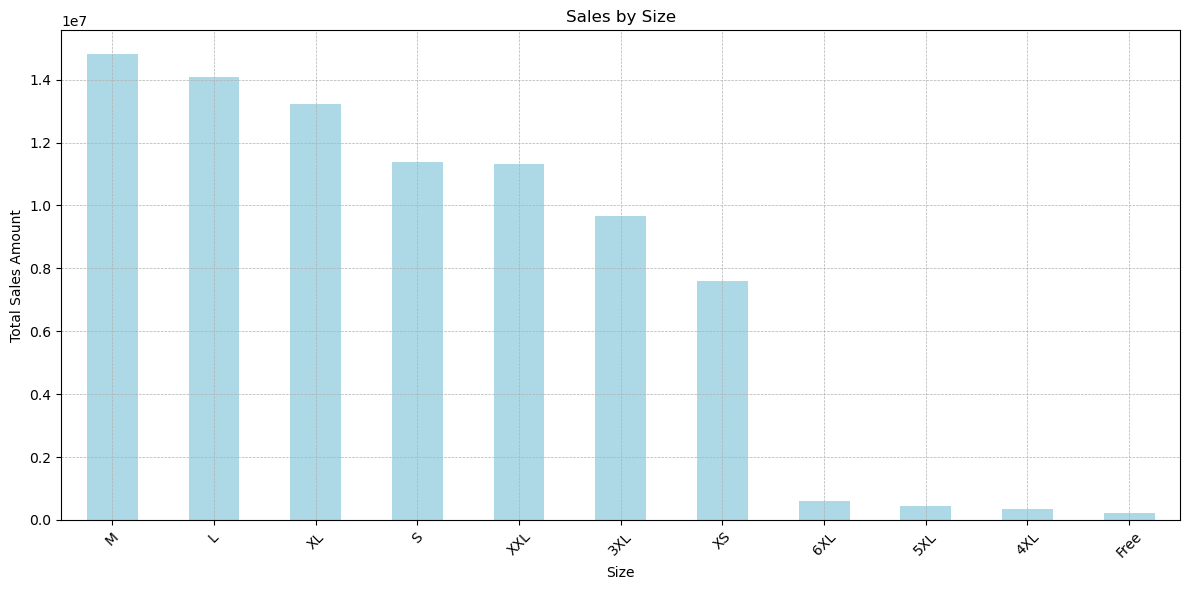

In [83]:
sales_by_size = data_copy.groupby('Size')['Amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sales_by_size.plot(kind='bar', color='lightblue')
plt.title('Sales by Size')
plt.ylabel('Total Sales Amount')
plt.xlabel('Size')
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


### 2. What is the average sales amount for each category?

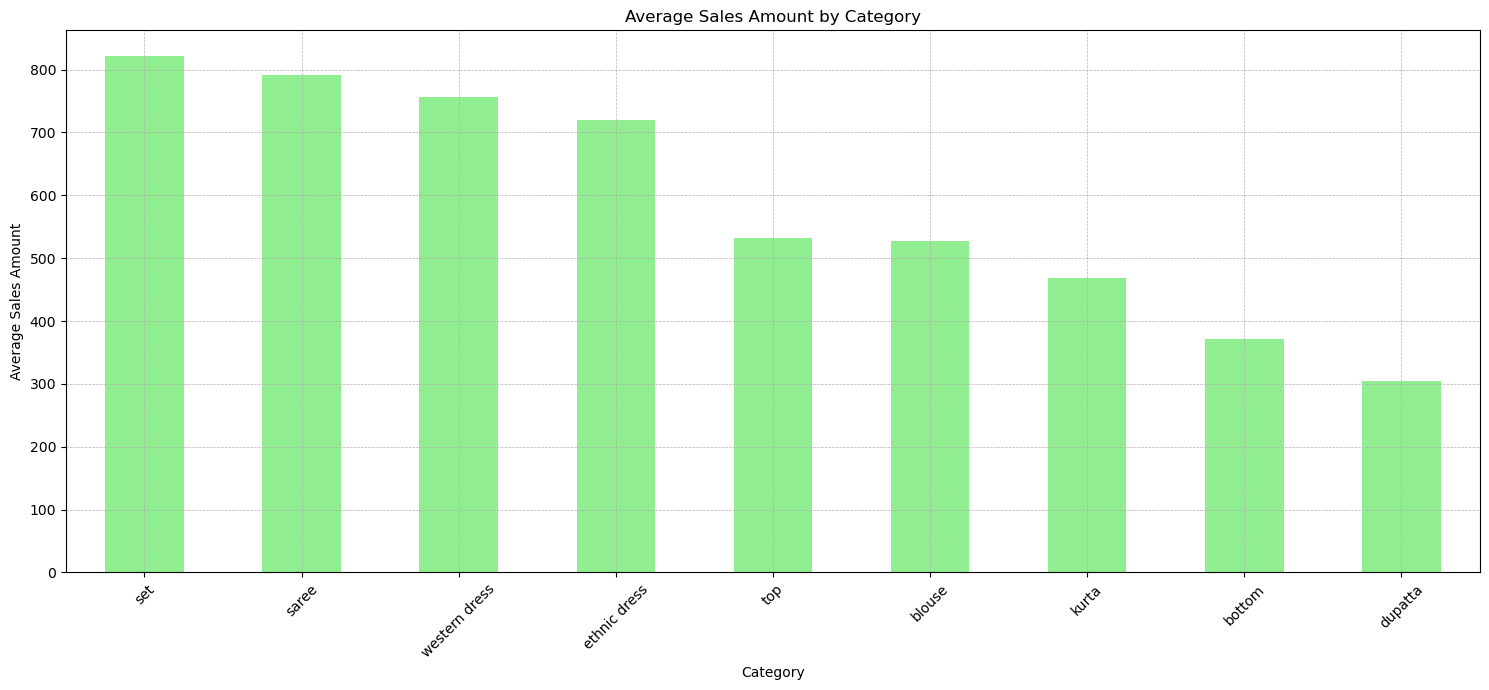

In [84]:
# Grouping by Category and computing the average sales amount
average_sales_per_category = data_copy.groupby('Category')['Amount'].mean().sort_values(ascending=False)

# Plotting the results
plt.figure(figsize=(15, 7))
average_sales_per_category.plot(kind='bar', color='lightgreen')
plt.title('Average Sales Amount by Category')
plt.ylabel('Average Sales Amount')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


## <mark>Customer Analysis</mark>

### 1. How many unique customers are there?

In [85]:
n_unique_customers = data_copy['Order ID'].nunique()

(0.0, 1.0, 0.0, 1.0)

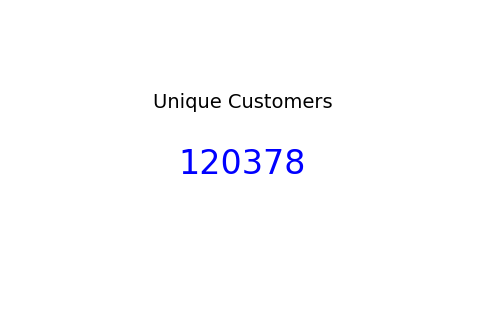

In [86]:
fig, ax = plt.subplots(figsize=(6,4))

# Display the number
ax.text(0.5, 0.5, str(n_unique_customers), ha='center', va='center', fontsize=24, color='blue')
ax.text(0.5, 0.7, 'Unique Customers', ha='center', va='center', fontsize=14, color='black')

# Remove axis
ax.axis('off')


In [89]:
data_copy.columns

Index(['Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'B2B', 'Month', 'Day',
       'Year', 'day_of_week', 'Total_Sales', 'Is_Weekend'],
      dtype='object')

### 2. What's the distribution of orders per customer

In [95]:
orders_per_city = data_copy.groupby('ship-state')['Order ID'].count().reset_index()
orders_per_city = orders_per_city.sort_values(by='Order ID', ascending=False).head(20)

In [108]:
fig = px.bar(orders_per_city, x='ship-state', y='Order ID', 
             title='Top 20 Cities by Number of Orders',
             labels={'Order ID': 'Number of Orders', 'ship-city': 'City'},
             color='Order ID', color_continuous_scale='icefire')
fig.show()

### 3. Which days of the week have the highest sales?

In [138]:
sales_per_day = data_copy.groupby('day_of_week')['Total_Sales'].sum().reset_index()

In [137]:
fig = px.pie(day_sales, values='Total_Sales', names='day_of_week', title='Sales Distribution Across Days of the Week')
fig.show()

### 4. Which month or time of the year register the highest sales?

In [149]:
month_sales = data_copy.groupby('Month')['Total_Sales'].sum().reset_index()

fig = px.line(month_sales, x='Month', y='Total_Sales', title='Monthly Sales Distribution', markers=True)
fig.show()

## <mark>Geographical Analysis</mark>


### 1. Which ship-state or ship-city generates the most sales?

In [160]:
city_sales = data_copy.groupby('ship-city')['Total_Sales'].sum().sort_values(ascending=False).head(10).reset_index()

fig = px.bar(city_sales, x='ship-city', y='Total_Sales', title='Top 10 Cities by Sales')
fig.show()

### 2. States or Cities with high sales but fewer orders

In [172]:
grouped = data_copy.groupby('ship-state').agg({'Total_Sales':'sum', 'Order ID':'count'}).reset_index()
grouped.rename(columns={'Total_Sales':'Total_Sales', 'Order ID':'Total_Orders'}, inplace=True)

In [174]:
grouped['Avg_Order_Value'] = grouped['Total_Sales'] / grouped['Total_Orders']

# Sort by Average Order Value to identify states with high average sales but fewer orders
top_states = grouped.sort_values(by='Avg_Order_Value', ascending=False)

In [178]:
fig = px.scatter(top_states, 
                 x='Total_Orders', 
                 y='Total_Sales', 
                 size='Avg_Order_Value', 
                 hover_name='ship-state', 
                 title='Bubble Chart of Sales, Orders, and Average Order Value by State',
                 size_max=30)

# Display the figure
fig.show()

## <mark>Shipping Analysis</mark>

### 1. What are the most common shipping levels

In [179]:
shipping_counts = data_copy['ship-service-level'].value_counts().reset_index()
shipping_counts.columns = ['Shipping Level', 'Count']

In [180]:
shipping_counts

,Shipping Level,Count
0,Expedited,88615
1,Standard,40360


In [185]:
fig = px.bar(shipping_counts, x='Shipping Level', y='Count', title='Most Common Shipping Levels')
fig.show()

### 2. Does the shipping service level influence sales? (Do premium shipping services result in more sales?)

In [186]:
shipping_sales = data_copy.groupby('ship-service-level')['Amount'].sum().reset_index()

fig = px.bar(shipping_sales, x='ship-service-level', y='Amount', title='Total Sales by Shipping Service Level')
fig.show()

### 3. How does the Courier Status relate to sales? (Which courier partners are bringing in the most revenue?)

In [187]:
courier_sales = data_copy.groupby('Courier Status')['Amount'].sum().reset_index()

fig = px.pie(courier_sales, names='Courier Status', values='Amount', title='Sales Distribution by Courier Status')
fig.show()

## <mark>Payment Analysis</mark>

### 1. Does the B2B column indicate higher sales values compared to non-B2B transactions?

In [192]:
b2b_avg_sales = data_copy.groupby('B2B')['Amount'].mean().reset_index()

fig = px.bar(b2b_avg_sales, x='B2B', y='Amount', title='Average Sales for B2B vs. Non-B2B')
fig.show()